### Ejercicio de Regresión 1 (Core)
 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.


Descripción del problema: Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

### Carga de datos: 
Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
SqFt: Tamaño de la casa en pies cuadrados.
Bedrooms: Número de habitaciones.
Bathrooms: Número de baños.
price: Precio de venta de la casa.

In [19]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

path = '../../../data/house-prices.csv'
df = pd.read_csv(path)
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### Exploracion de datos

Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [21]:
## Cambiar los tipos de datos
df['Brick'] = df['Brick'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Home          128 non-null    int64   
 1   Price         128 non-null    int64   
 2   SqFt          128 non-null    int64   
 3   Bedrooms      128 non-null    int64   
 4   Bathrooms     128 non-null    int64   
 5   Offers        128 non-null    int64   
 6   Brick         128 non-null    category
 7   Neighborhood  128 non-null    category
dtypes: category(2), int64(6)
memory usage: 6.6 KB


In [22]:
## Revisar duplicados
df.duplicated().sum()

0

In [23]:
#  Revisar valores unicos en las columnas categoricas para verificar la consistencia
categorical_cols = {'Brick', 'Neighborhood'}
unique_values = {col: df[col].unique() for col in categorical_cols}
unique_values

{'Neighborhood': ['East', 'North', 'West']
 Categories (3, object): ['East', 'North', 'West'],
 'Brick': ['No', 'Yes']
 Categories (2, object): ['No', 'Yes']}

In [24]:
# Revisar valores nulos
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [25]:
# Detectar datos anomalos
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


No hay anomalias aparentes

In [26]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Home,0.0,0.00000,1.0,128.0
Price,1.0,0.78125,69100.0,199500.0
SqFt,2.0,1.56250,1520.0,2530.0
Bedrooms,61.0,47.65625,3.0,3.0
Bathrooms,0.0,0.00000,2.0,4.0
Offers,4.0,3.12500,1.0,4.0


In [27]:
df.Bedrooms.describe()

count    128.000000
mean       3.023438
std        0.725951
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Bedrooms, dtype: float64

In [28]:
df.Price.describe()

count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      111325.000000
50%      125950.000000
75%      148250.000000
max      211200.000000
Name: Price, dtype: float64

In [29]:
df.SqFt.describe()

count     128.000000
mean     2000.937500
std       211.572431
min      1450.000000
25%      1880.000000
50%      2000.000000
75%      2140.000000
max      2590.000000
Name: SqFt, dtype: float64

La mayoria de los clientes tiene tres cuartos, lo que no necesariamente es un dato anomalo. Para las demas variables como sqft y price, hay muy pocos valores anomalos que tampoco tienen relevancia.


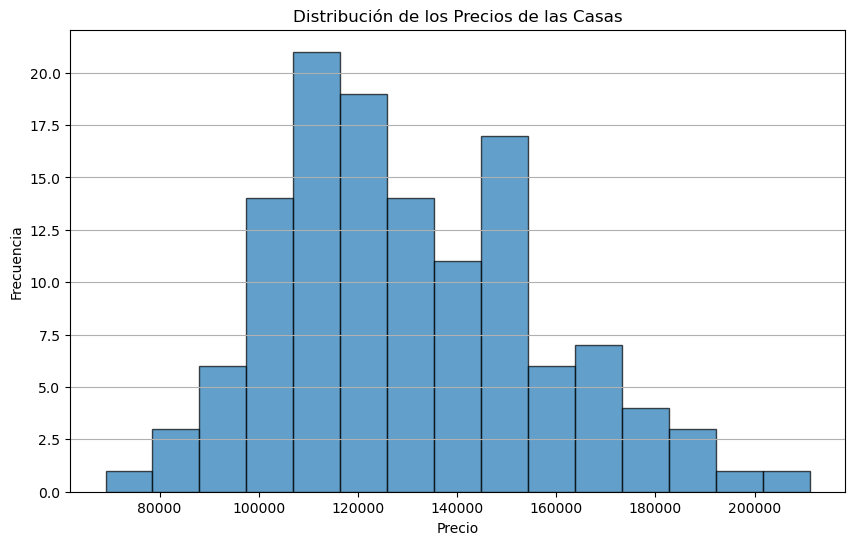

In [30]:
# Visualización de los datos
# Configuración del tamaño de las gráficas
plt.figure(figsize=(10, 6))

# Histograma para la distribución de los precios (Price)
plt.hist(df['Price'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Distribución de los Precios de las Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()



 La mayoría de las casas tienen un precio entre $100,000 y $150,000, con el pico más alto en torno a $120,000.
Outliers: Existen algunas casas con precios superiores a $180,000, pero son menos frecuentes.

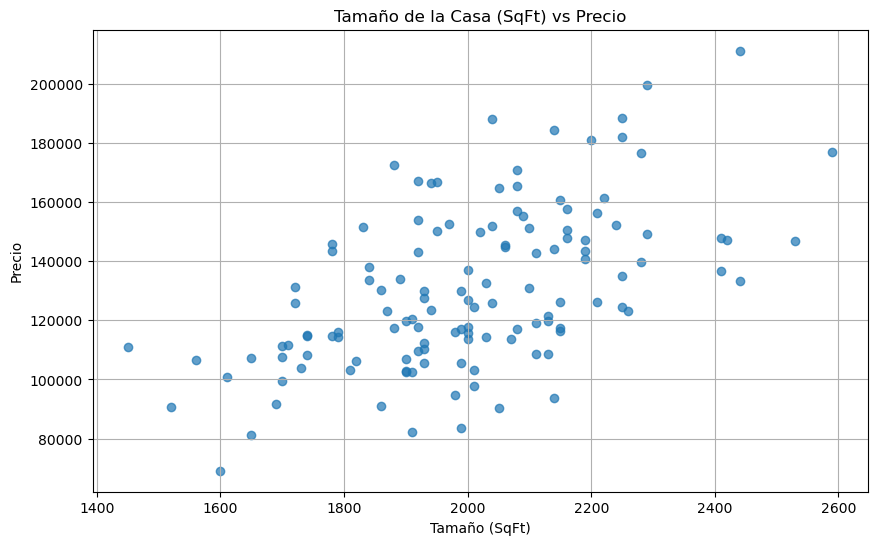

In [31]:
# Gráfico de dispersión: Tamaño (SqFt) vs Precio
plt.figure(figsize=(10, 6))
plt.scatter(df['SqFt'], df['Price'], alpha=0.7)
plt.title('Tamaño de la Casa (SqFt) vs Precio')
plt.xlabel('Tamaño (SqFt)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()



Hay una relación positiva entre el tamaño de la casa y el precio, lo que significa que las casas más grandes tienden a tener precios más altos.
Dispersión: Aunque la relación es positiva, existe cierta dispersión, especialmente en casas con tamaños mayores a 2,200 sq ft, lo que indica que el precio no depende exclusivamente del tamaño.
Outliers: Pueden observarse algunos puntos fuera de la tendencia general, como casas de menor tamaño con precios más altos o casas grandes con precios bajos.

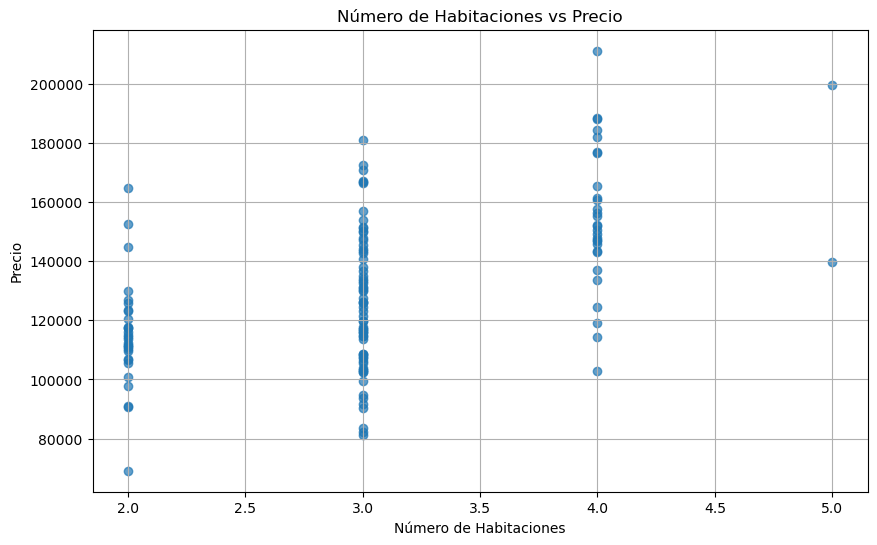

In [32]:
# Gráfico de dispersión: Número de Habitaciones vs Precio
plt.figure(figsize=(10, 6))
plt.scatter(df['Bedrooms'], df['Price'], alpha=0.7)
plt.title('Número de Habitaciones vs Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.grid(True)
plt.show()



Hay una relación positiva entre el número de habitaciones y el precio de las casas. Sin embargo, el incremento en el precio no es lineal y parece estabilizarse en casas con más de 4 habitaciones.
Agrupación de datos: Los precios se agrupan claramente por cada categoría de habitaciones, lo que indica que el número de habitaciones tiene un impacto significativo en el precio.
Outliers: Existen algunos valores extremos, como casas con 2 o 3 habitaciones que tienen precios inusualmente altos.

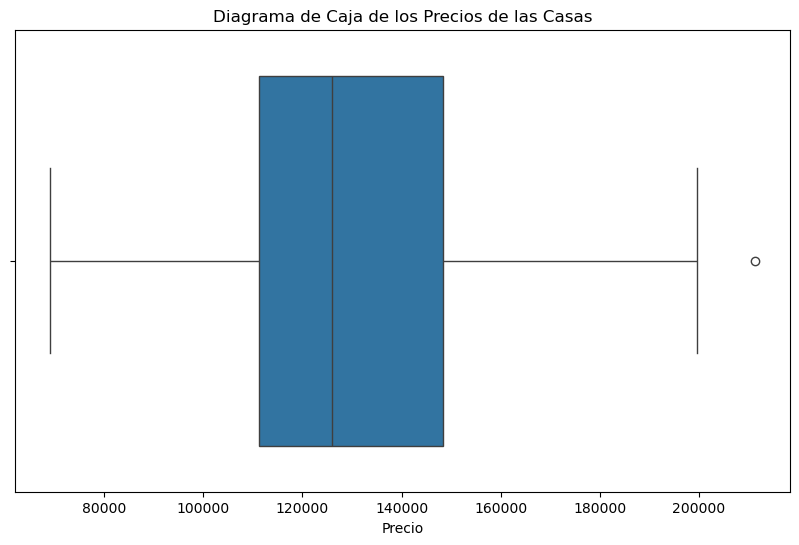

In [33]:
# Diagrama de caja (Boxplot) para detectar valores atípicos en los precios
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Diagrama de Caja de los Precios de las Casas')
plt.xlabel('Precio')
plt.show()



La mayoría de los precios de las casas se concentran entre aproximadamente $100,000 y $150,000.

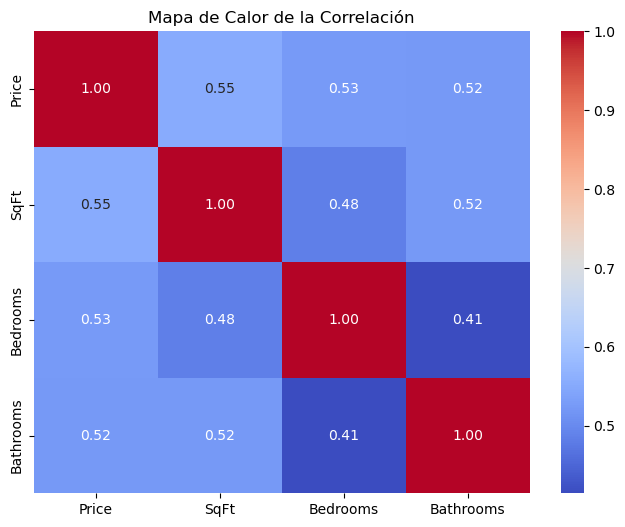

In [34]:
# Heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price', 'SqFt', 'Bedrooms', 'Bathrooms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación')
plt.show()



Ninguna variable tiene una correlación extremadamente alta con el precio, lo que sugiere que múltiples factores contribuyen al precio de las casas.

### Preparacion de datos


Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [35]:

# Seleccionar variables relevantes y la variable target
features = df[['SqFt', 'Bedrooms', 'Bathrooms']]
target = df['Price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((102, 3), (26, 3), (102,), (26,))

### Entrenamiento del modelo: 
Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

In [36]:

# Entrenar el modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

coeficientes = linear_model.coef_
intercepto = linear_model.intercept_

coeficientes, intercepto


(array([   41.44755181, 10278.00910207, 13090.39118144]), -16372.916362967415)

### Evaluación del modelo: 
Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

In [37]:

# Hacer predicciones en el set de prueba
y_pred = linear_model.predict(X_test)

# Calcular el error cuadrado medio (MSE) y R-cuadrado (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(320149938.2302679, 0.45681957775488824)

### Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
Tamaño: 2000 pies cuadrados
Habitaciones: 3
Baños: 2

In [38]:

caracteristicas_casa = [[2000, 3, 2]]  
precio_predecido = linear_model.predict(caracteristicas_casa)

precio_predecido[0]


c:\Users\Gonzalo\anaconda3\envs\mitic-data-science-setiembre-2024\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


123536.9969321844